In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import gmaps
import os
import requests
import time
from scipy.stats import linregress
from pprint import pprint



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
#from api_keys import g_key
#from api_keys import weather_api_key
#gmaps.configure(api_key=g_key)

# Save config information.
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# Build partial query URL
map_query_url = f"{map_url}&key={g_key}&address="


In [36]:
# Input File (CSV)
input_data_file_city = "Data/annual_aqi_by_cbsa_2019.csv"
input_data_file_county = "Data/annual_aqi_by_county_2019.csv"

aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)


# Create temp table grouped by state
aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()
# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2,
                                  
                             })

aqi_state_summary.head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Alabama,142.687500,32.937500,0.062500,0.000000,0.000000,0.062500,0.062500,105.187500,4.625000
Alaska,157.500000,25.333333,1.333333,0.000000,0.000000,0.500000,2.666667,52.833333,0.166667
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
Arkansas,146.384615,32.615385,0.000000,0.000000,0.000000,0.076923,0.153846,88.538462,0.000000
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736


y = 0.95x + -36.12


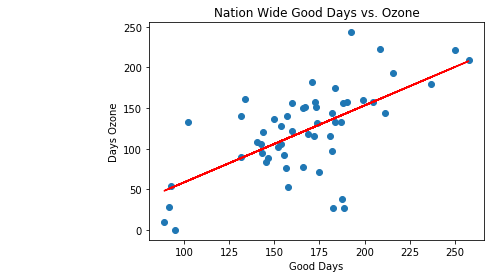

In [47]:
x_values = aqi_state_summary["Good Days"]
y_values = aqi_state_summary["Days Ozone"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.xlabel('Good Days')
plt.ylabel('Days Ozone')
plt.title("Nation Wide Good Days vs. Ozone")
plt.plot(x_values,regress_values,"r-")
#plt.savefig('../Images/regres_temp_v_lat.png')
plt.annotate(line_eq, (2,10), fontsize=15,color="red")
print(line_eq);

In [43]:
#quartiles for Ozone
quartiles = aqi_state_summary["Days Ozone"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 90.08152173913044
The upper quartile is: 156.2837837837838
The interquartile  is: 66.20226204465337
The the median is: 129.6994301994302 
Values below -9.221871327849612 could be outliers.
Values above 255.58717685076385 could be outliers.


y = 0.0x + 3.05


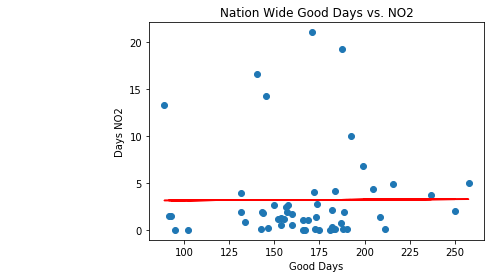

In [46]:
x_values = aqi_state_summary["Good Days"]
y_values = aqi_state_summary["Days NO2"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.xlabel('Good Days')
plt.ylabel('Days NO2')
plt.title("Nation Wide Good Days vs. NO2")
plt.plot(x_values,regress_values,"r-")
#plt.savefig('../Images/regres_temp_v_lat.png')
plt.annotate(line_eq, (2,6), fontsize=15,color="red")
print(line_eq);

In [45]:
#quartiles for Ozone
quartiles = aqi_state_summary["Days NO2"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile  is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 0.18681318681318682
The upper quartile is: 3.4767025089605736
The interquartile  is: 3.2898893221473866
The the median is: 1.4865319865319866 
Values below -4.748020796407893 could be outliers.
Values above 8.411536492181654 could be outliers.


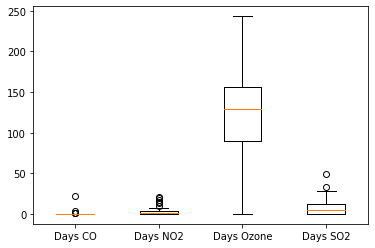

In [38]:
#Days CO	Days NO2	Days Ozone	Days SO2
plt.boxplot([aqi_state_summary["Days CO"], aqi_state_summary["Days NO2"], aqi_state_summary["Days Ozone"], aqi_state_summary["Days SO2"]], labels=["Days CO", "Days NO2", "Days Ozone", "Days SO2"]);


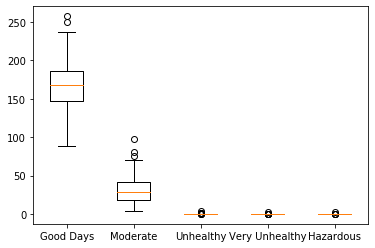

In [25]:
plt.boxplot([aqi_state_summary["Good Days"], aqi_state_summary["Moderate Days"], aqi_state_summary["Unhealthy Days"], aqi_state_summary["Very Unhealthy Days"], aqi_state_summary["Hazardous Days"]], labels=["Good Days", "Moderate", "Unhealthy", "Very Unhealthy", "Hazardous"]);


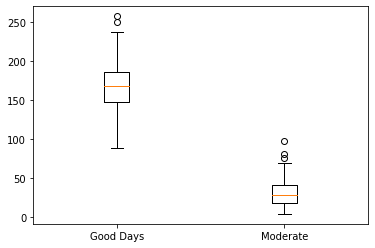

In [26]:
plt.boxplot([aqi_state_summary["Good Days"], aqi_state_summary["Moderate Days"]], labels=["Good Days", "Moderate"]);

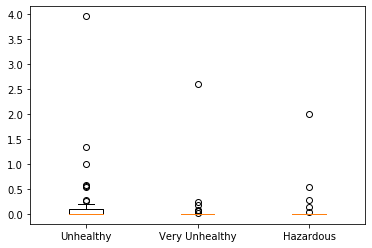

In [31]:
plt.boxplot([aqi_state_summary["Unhealthy Days"], aqi_state_summary["Very Unhealthy Days"], aqi_state_summary["Hazardous Days"]], labels=["Unhealthy", "Very Unhealthy", "Hazardous"]);

In [12]:
# Format DataFrame
#def format_dataset ():
#    aqi_state_summary['Good Days'] = aqi_state_summary['Good Days'].map("{:.2f}".format)
#    aqi_state_summary['Moderate Days'] = aqi_state_summary['Moderate Days'].map("{:.2f}".format)
#    aqi_state_summary['Unhealthy Days'] = aqi_state_summary['Unhealthy Days'].map("{:.2f}".format)
#    aqi_state_summary['Very Unhealthy Days'] = aqi_state_summary['Very Unhealthy Days'].map("{:.2f}".format)
#    aqi_state_summary['Hazardous Days'] = aqi_state_summary['Hazardous Days'].map("{:.2f}".format)
#    aqi_state_summary['Days CO'] = aqi_state_summary['Days CO'].map("{:.2f}".format)
#    aqi_state_summary['Days NO2'] = aqi_state_summary['Days NO2'].map("{:.2f}".format)
#    aqi_state_summary['Days Ozone'] = aqi_state_summary['Days Ozone'].map("{:.2f}".format)
#    aqi_state_summary['Days SO2'] = aqi_state_summary['Days SO2'].map("{:.2f}".format)

In [114]:
# Top 5 States with Good Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Maine,257.600000,13.300000,0.1,0.0,0.0,0.300000,5.000000,209.400000,0.000000
North Dakota,250.000000,22.500000,0.1,0.0,0.0,0.100000,2.000000,221.000000,5.700000
New York,237.000000,22.903226,0.0,0.0,0.0,0.258065,3.709677,179.419355,27.258065
Massachusetts,215.538462,25.153846,0.0,0.0,0.0,0.153846,4.923077,192.923077,0.000000
Mississippi,211.300000,42.300000,0.0,0.0,0.0,0.100000,0.100000,144.300000,0.000000


In [111]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Hazardous Days', ascending=False).head()


,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Puerto Rico,89.000000,19.000000,0.200000,2.600000,2.000000,22.300000,13.300000,9.800000,10.300000
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
New Mexico,133.818182,69.909091,0.272727,0.181818,0.272727,0.000000,0.818182,161.727273,0.090909
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736
Colorado,131.440000,54.120000,0.080000,0.000000,0.040000,0.320000,3.920000,140.520000,0.120000


In [ ]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],c="red",edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Max Temperature (F) vs. Latitude")
plt.savefig('../Images/temp_v_lat.png')
plt.show();

In [115]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [117]:
## City based data analysis
# Data is not collected for all 365 days so an accurate picture cannot be attained with certainty.  
#This data has to be taken into consideration when stating results
data_coverage = []

#Collect city good
good_days_percent = [] 
Unhealthy_Hazardour_percent = []


#collected data percentage 
data_coverage = aqi_city["Days with AQI"] / 365
good_days_percent = aqi_city["Good Days"]/aqi_city["Days with AQI"]

aqi_city["Year Coverage"] = data_coverage
aqi_city["Good Day Percent"] = good_days_percent


df = pd.DataFrame(aqi_city)
df.head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Year Coverage,Good Day Percent
0,"Aberdeen, SD",10100,2019,60,52,8,0,0,0,0,...,56,24,0,0,0,0,54,6,0.164384,0.866667
1,"Aberdeen, WA",10140,2019,199,199,0,0,0,0,0,...,30,18,0,0,0,0,199,0,0.545205,1.000000
2,"Adjuntas, PR",10260,2019,57,53,4,0,0,0,0,...,44,18,0,0,0,0,57,0,0.156164,0.929825
3,"Adrian, MI",10300,2019,181,145,36,0,0,0,0,...,57,40,0,0,94,0,87,0,0.495890,0.801105
4,"Akron, OH",10420,2019,273,203,67,3,0,0,0,...,62,44,0,0,162,1,110,0,0.747945,0.743590


In [128]:
## Cities with best data coverage for evaluation (atleast 70% or higher data collected) 
# that have had best good days in regards to AQI

# Top 5 cities with best air quality 
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
df = pd.DataFrame(coverage)
df = df.sort_values(['Year Coverage','Good Day Percent'], ascending=[False,False]).head()
print(df['CBSA'])

369       Portland-South Portland, ME
124    Des Moines-West Des Moines, IA
376                    Provo-Orem, UT
406                Salt Lake City, UT
31                         Bangor, ME
Name: CBSA, dtype: object


In [70]:
## Build Map Data for State using city data

available_cities = []
state = []
lats = []
lngs = []
medianAQI = []

# loops for creating dataframe columns
print("Pulling City Lat and Lng data..")

for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        lat = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat)
        lngs.append(lng)

        medianAQI.append(aqi_city['Median AQI'][i])

        #print(aqi_city['CBSA'][i] + ", Median AQI = " + str(aqi_city['Median AQI'][i]), "Lat:" + str(round(lat,2)) 
        #      + ", Lng:" + str(round(lng,2)))
    except Exception:
        print(aqi_city['CBSA'][i] + " not found!")

print("Data Read Completed")

available_city_data = {
    "City":available_cities,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI
}
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()

Pulling City Lat and Lng data..
Data Read Completed


,City,Lat,Lng,AQI
0,"Aberdeen, SD",45.46,-98.49,24
1,"Aberdeen, WA",46.98,-123.82,18
2,"Adjuntas, PR",18.16,-66.72,18
3,"Adrian, MI",41.90,-84.04,40
4,"Akron, OH",41.08,-81.52,44


In [84]:
## Median Air Quality Index Heatmap

#Coordinates
location_data = map_ready_data[["Lat","Lng"]]

#AQI info
AQI_data = map_ready_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=AQI_data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…